# Practice Assignment 9.1

## (Consider the statement for Q1-Q4)
Load the iris dataset from sklearn.

Remove the rows if it contain NULL values.

Train the model Using Kmeans Clustering by setting the parameter as following:
   "init": "random",    "n_init": 50,    "max_iter": 500,    "random_state": 10

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import load_iris
X, y = load_iris(as_frame=True, return_X_y=True)

In [ ]:
X.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
y.isnull().sum()

0

### Q1 Which feature pair has the highest correlation cofficient value.

In [ ]:
X.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


### Q2 Enter the value of the ' inertia_' score Keeping k=5.

In [ ]:
from sklearn.cluster import KMeans

kmean_model = KMeans(n_clusters=5, init='random', n_init=50, max_iter=50, random_state=10)

kmean_model.fit(X, y)

kmean_model.inertia_

46.446182051282065

### Q3 Plot the elbow chart for the given data by taking k=1 to k=12. At which k value elbow is formed?

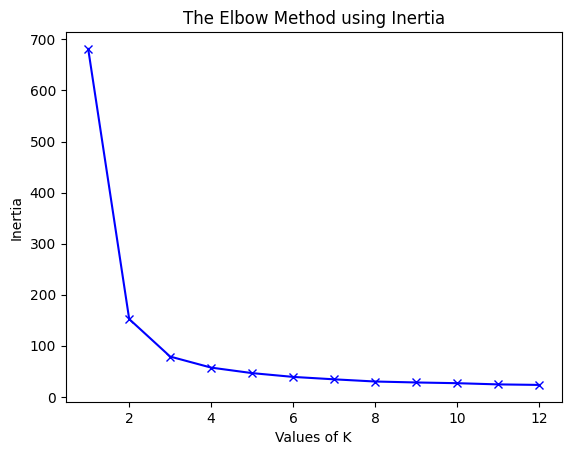

In [ ]:
K = [i for i in range(1,13)]
inertia = []

for i in K:
  model = KMeans(n_clusters=i, init='random', n_init=50, max_iter=50, random_state=10)
  model.fit(X, y)
  inertia.append(model.inertia_)


plt.plot(K, inertia, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


### Q4 What is the value of ' inertia_' score at k=3.

In [ ]:
inertia[2]

78.851441426146

## (Consider the statement for Q5-Q6)
Load the iris dataset from sklearn.

Remove the rows if it contain NULL values.

Train the model using Agglomerative Clustering by setting the parameter as following
n_clusters=3,affinity='euclidean', linkage='ward'
1
n_clusters=3,affinity='euclidean', linkage='ward'

In [ ]:
from sklearn.datasets import load_iris
X, y = load_iris(as_frame=True, return_X_y=True)

### Q5 What is the label predicted for last row of samples.

Ans: 0

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3,affinity='euclidean', linkage='ward')

ac.fit_predict(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

### Q6 Enter the number of leaves in the hierarchical tree.

In [ ]:
ac.n_leaves_

150

# Practice Assignment 9.2

## About the dataset:
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

dataset - "https://drive.google.com/file/d/10Dj5jGYoqc7T5AMV_jBXJzDQQscHbrQ9/view?usp=sharing"

## Instructions for questions 1,2 and 3
Load the diabetes dataset.
Separate features and label.

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

### Q1 Which of the following feature pairs have negative correlation?

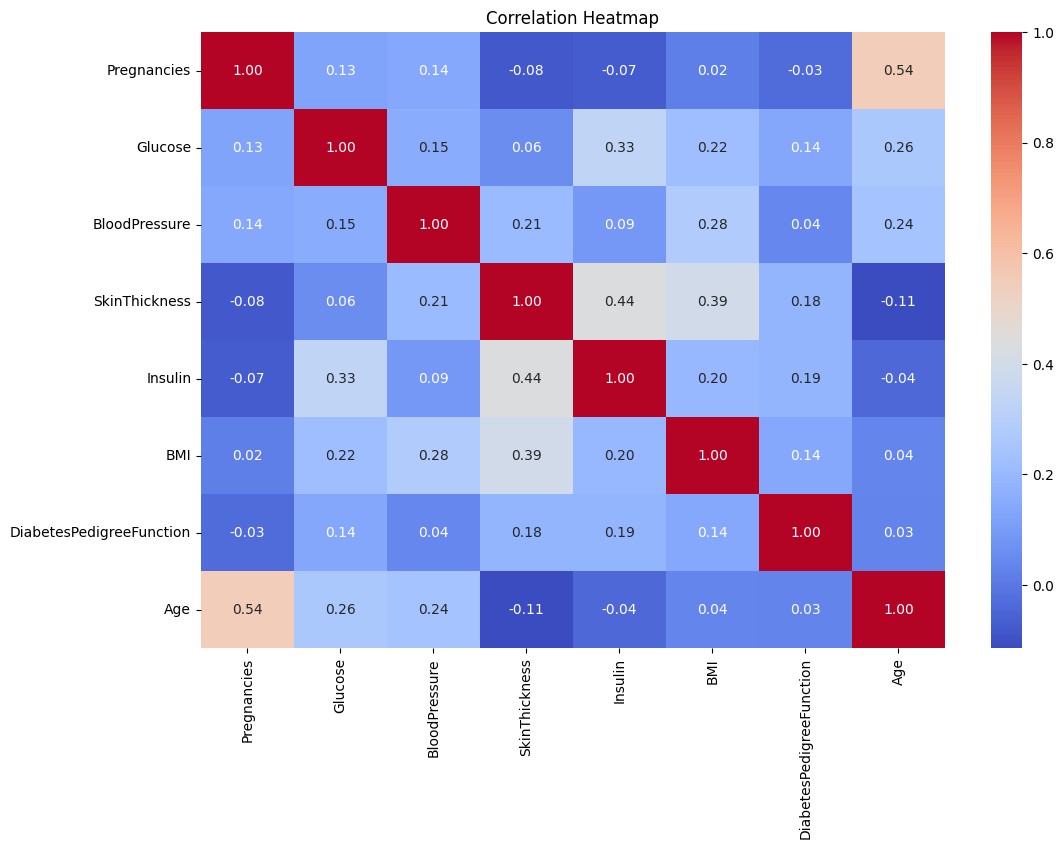

In [ ]:
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

### Q2 Which of the following features has the highest standard deviation?

In [ ]:
X.describe().loc['std']

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Name: std, dtype: float64

### Q3 Is there any missing values in the dataset?

In [ ]:
X.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [ ]:
y.isnull().sum()

0

## Instructions for questions 4 to 7
split the dataset into training and test dataset in 80:20 proportion with

1
"random_state": 1
Create a pipeline with scaler as StandardScaler and classifier as MLPClassifier.

Classifier should have the following properties:

Classifier should have three hidden layers with 10 neurons each.
set:

`activation='relu', solver='sgd', alpha= 1e-4, learning_rate_init= 0.2 ,max_iter=500, random_state=1`

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier(hidden_layer_sizes=(10,10,10), activation='relu', solver='sgd', alpha= 1e-4, learning_rate_init= 0.2 ,max_iter=500, random_state=1))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 MLPClassifier(hidden_layer_sizes=(10, 10, 10),
                               learning_rate_init=0.2, max_iter=500,
                               random_state=1, solver='sgd'))])

### Q4 What will be the mean accuracy of the model on the training data?

In [ ]:
pipe.score(X_train, y_train)

0.7915309446254072

### Q5 What will be the mean accuracy of the model on the test data?

In [ ]:
pipe.score(X_test, y_test)

0.7662337662337663

### Q6 What is the output activation function used by the classifier?

In [ ]:
pipe.named_steps['classifier'].out_activation_

'logistic'

### Q7 How many weights (excluding intercepts) between input layer and first hidden layer were learnt by the classifier?

In [ ]:
pipe.named_steps['classifier'].coefs_[0].shape

(8, 10)

# Graded Assignment 9 (Part A)

## Data Set Information:

Live selling is becoming increasingly popular in Asian countries. Small vendors can now reach a wider audience and connect with many customers. Analyze The variability of consumer engagement on Facebook Live data which can help sellers to build selling approach and activities for the company.

## (Consider the statement for Q1- Q8) Load the dataset using following link

Url= "https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv"

Check if any feature contains Null values.

Drop all the features which have Null values.

Save 'status_type' as target variable.

Drop the feature "status_id", "status_type" and "status_published" from training set.

Use LabelEncoder to transform the target variable.

Use standard scaler to scale the features.

For Q4,Q5 Train the model using Kmeans clustering (Take Random state=10)

For Q6,Q7,Q8 Train the model using Agglomerative Clustering by setting the parameter as following:

`n_clusters=4,affinity='euclidean', linkage='ward'`

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00488/Live_20210128.csv')
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,1,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,2,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,3,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,4,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,5,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


### Q1 What is the shape of the data?

In [ ]:
df.shape

(7050, 16)

### Q2 How many feature contain Null values?

In [ ]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

### Q3 Column 'status_type' has _ _ _ _ (number) unique values.

In [ ]:
df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

Processing

In [ ]:
X = df.drop('status_type', axis=1)
y = df['status_type']

In [ ]:
X = X.drop(['Column1', 'Column2', 'Column3', 'Column4', 'status_id', 'status_published'], axis=1)

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

le = LabelEncoder()
encoded_y = le.fit_transform(y)

scaler = StandardScaler()
transformed_X = scaler.fit_transform(X)

### Q4 Enter the inertia score at k=2

In [ ]:
kmeans_model = KMeans(n_clusters=2,random_state=10)

kmeans_model.fit(transformed_X, encoded_y)

print(round(kmeans_model.inertia_, 3))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


48278.098


### Q5 How many labels were predicted accurately at k=4?

In [ ]:
kmeans_model = KMeans(n_clusters=4,random_state=10)

kmeans_model.fit_predict(transformed_X, encoded_y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(transformed_X,kmeans_model.labels_)
round(score, 5) * 100

75.77000000000001

### Q6-Q8

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=4,affinity='euclidean', linkage='ward')

ac.fit_predict(transformed_X, encoded_y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([3, 3, 3, ..., 3, 3, 3])

### Q6 What is the label predicted for first row of samples.

In [ ]:
ac.fit_predict(transformed_X, encoded_y)[0]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


3

### Q7 Enter the number of leaves in the hierarchical tree.

In [ ]:
ac.n_leaves_

7050

### Q8 What is the accuracy of the model(in Percentage)?

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(transformed_X,ac.labels_,metric='euclidean')
round(score, 5) * 100

75.32600000000001

# Graded Assignment 9 (Part B)


## About the dataset:
dataset URl: https://drive.google.com/file/d/1cBPurUshGKrK72SWsCatRHomjMnAWK6f/view?usp=sharing

The dataset contains 9471 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year)representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer.

Attributes:

Date (DD/MM/YYYY)
Time (HH.MM.SS)
True hourly averaged concentration CO in mg/m^3 (reference analyzer)
PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)
True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)
True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)
PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)
True hourly averaged NOx concentration in ppb (reference analyzer)
PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)
True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)
PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)
PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)
Temperature in Â°C
Relative Humidity (%)
AH Absolute Humidity


## Information for questions 1 and 2 and 3.
Load the AirQualityUCI dataset.
Drop 'Date', 'Time', 'Unnamed: 15', 'Unnnamed: 16' columns.
Drop all the rows which has at-least one missing value.

In [ ]:
df = pd.read_csv('/content/AirQualityUCI.csv')
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10-03-2004,18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10-03-2004,19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10-03-2004,20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10-03-2004,21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10-03-2004,22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN


In [ ]:
df = df.drop(['Date', 'Time', 'Unnamed: 15', 'Unnamed: 16'], axis=1)

In [ ]:
df.shape

(9471, 13)

In [ ]:
df = df.dropna()

### Q1 What is the shape of the dataset after dropping the rows and colums as mentioned above?

In [ ]:
df.shape

(9357, 13)

### Q2 The task is to predict the absolute humidity at a particular time based on other features. So, we will have AH as the target variable. Under which category does this task fall?

In [ ]:
X = df.drop('AH', axis=1)
y = df['AH']

### Q3 What is the value of correlation co-efficient between temperature (T) and relative humidity (RH)?

In [ ]:
X.corr()['RH']['T']

0.8859105241276131

## Instructions for questions 4
Separate features and target variable.
split the dataset into training and test dataset in 80:20 proportion with "random_state=1"
Create a pipeline with scaler as StandardScaler and classifier as MLPRegressor.
Classifier should have the following properties:
Classifier should have three hidden layers with 50 neurons each.
set

`tol=1e-2, alpha=1e-4,solver="adam", learning_rate_init=0.1, max_iter=50, random_state=1`

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', MLPRegressor(hidden_layer_sizes=(50,50,50), tol=1e-2, alpha=1e-4,solver="adam", learning_rate_init=0.1, max_iter=50, random_state=1))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier',
                 MLPRegressor(hidden_layer_sizes=(50, 50, 50),
                              learning_rate_init=0.1, max_iter=50,
                              random_state=1, tol=0.01))])

In [ ]:
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

### Q4 How many samples are there in the test dataset?

In [ ]:
X_test.shape

(1872, 12)

### Q5 What is the value of coefficient of determination of the prediction on the training dataset?

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_train, y_train_pred))

0.999992602958679


### Q6 What is the value of coefficient of determination of the prediction on the test dataset?

In [ ]:
print(r2_score(y_test, y_test_pred))

0.9999920781245708


### Q7 What will be the prediction of the model on the first intance of training set?

In [ ]:
y_train_pred[0]

1.5977531509181397